##  Building an Image Classifier Using the Sequential AP

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

print(f"Tensorflow: {tf.__version__}")
print(f"Keras: {keras.__version__}")


Tensorflow: 2.15.0
Keras: 2.15.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape

(60000, 28, 28)

In [3]:
y_train_full.shape

(60000,)

In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
output_length = len(class_names)
output_length

10

### Creating the Model Using the Sequential API

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:])) # X_train.reshape(-1, 1)
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation=keras.activations.relu))
model.add(keras.layers.Dense(output_length, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model’s summary() method displays all the model’s layers13, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters.

In [7]:
print(model.layers)
print(model.layers[0].name)
layers_name = [layer.name for layer in model.layers]
layers_name

[<keras.src.layers.reshaping.flatten.Flatten object at 0x0000017EAF708150>, <keras.src.layers.core.dense.Dense object at 0x0000017EB07B4090>, <keras.src.layers.core.dense.Dense object at 0x0000017EAF6F5C90>, <keras.src.layers.core.dense.Dense object at 0x0000017EB0AEDA10>]
flatten


['flatten', 'dense', 'dense_1', 'dense_2']

In [8]:
hidden_layer = model.get_layer(layers_name[1])
weights, biases = hidden_layer.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [9]:
weights

array([[ 0.06660174,  0.01684074,  0.05233055, ...,  0.00703537,
         0.07025374,  0.03781852],
       [ 0.05958168,  0.06113206,  0.03937369, ...,  0.07203975,
        -0.02082023, -0.02218516],
       [ 0.04791977,  0.00126714, -0.03268095, ..., -0.04279016,
        -0.05466526,  0.02241866],
       ...,
       [ 0.03992472,  0.05759546, -0.06508361, ...,  0.0183254 ,
         0.01775112, -0.01837265],
       [-0.03986507, -0.00359248, -0.0427481 , ..., -0.06563781,
        -0.03834514, -0.03505009],
       [ 0.01122111,  0.0127171 ,  0.04918212, ...,  0.07310326,
         0.02756535,  0.00327751]], dtype=float32)

In [10]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

 ### Compiling the Model

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

###  Training and Evaluating the Model

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 5s 3ms/step - loss: 0.7018 - accuracy: 0.7717 - val_loss: 0.4992 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4812 - accuracy: 0.8324 - val_loss: 0.4652 - val_accuracy: 0.8354
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4382 - accuracy: 0.8473 - val_loss: 0.4033 - val_accuracy: 0.8644
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4117 - accuracy: 0.8552 - val_loss: 0.3900 - val_accuracy: 0.8700
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3928 - accuracy: 0.8615 - val_loss: 0.3804 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8668 - val_loss: 0.3698 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3651 - accuracy: 0.8720 - val_loss: 0.3766 - val_accurac

In [13]:
print(history.params)
print(history.epoch)
print(history.history)

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
{'loss': [0.7017987966537476, 0.48122477531433105, 0.43818730115890503, 0.4116729497909546, 0.39284080266952515, 0.37668439745903015, 0.36511629819869995, 0.3528686761856079, 0.3439815938472748, 0.33454692363739014, 0.3253174126148224, 0.31745070219039917, 0.3106684982776642, 0.3033636510372162, 0.29745715856552124, 0.29129862785339355, 0.284566730260849, 0.2801539897918701, 0.274711549282074, 0.26991233229637146, 0.26390114426612854, 0.2599109411239624, 0.2542021870613098, 0.2501297891139984, 0.24553418159484863, 0.24262498319149017, 0.23789170384407043, 0.23482438921928406, 0.23059234023094177, 0.22725453972816467], 'accuracy': [0.7716909050941467, 0.8324363827705383, 0.8472727537155151, 0.8551818132400513, 0.8615272641181946, 0.8668000102043152, 0.871999979019165, 0.8752909302711487, 0.8776181936264038, 0.8807818293571472, 0.88332

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8808


[0.3324246406555176, 0.8808000087738037]

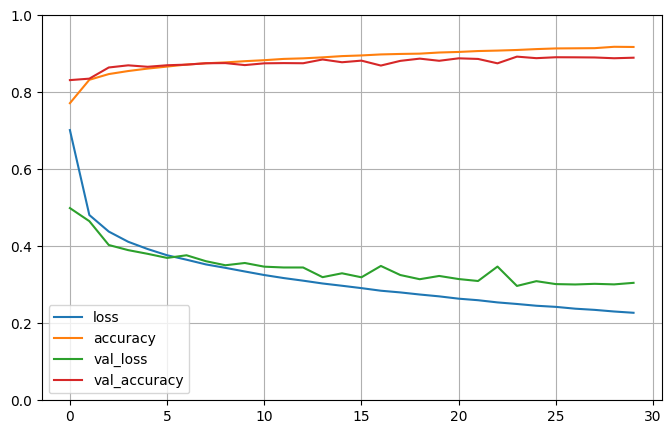

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Using the Model to Make Predictions

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(np.array(class_names)[y_pred])

print(y_test[:3])
print(np.array(class_names)[y_test[:3]])



1/1 [==============================] - 0s 28ms/step
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
